# CAP4770 Final Project
#### Created by: Matt Strenges, Tuyet Phan, and Mary Szabo
#### Summer 2023
Data source
https://www.datasciencedata.com/auto-insurance-churn-data

In [25]:
import pylab
import matplotlib
import pandas as pd
import numpy as np
import os

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV, train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from IPython.display import Image

df = pd.read_csv("full_auto_insurance_data.csv")

In [26]:
display(df) #Original DF

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,LATITUDE,LONGITUDE,STREET_ADDRESS,CITY,STATE,COUNTY,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE
0,2.213000e+11,NaN,5.213000e+11,818.87,1454.0,2018-12-09,44.474,1978-06-23,608-XX-7640,32.578829,-96.305006,52966 Welch Crescent,Kaufman,TX,Kaufman,22500.00,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN
1,2.213001e+11,NaN,5.213001e+11,974.19,1795.0,2018-01-02,72.559,1950-05-30,342-XX-6908,32.732209,-97.000893,46887 Lawrence Green,Grand Prairie,TX,Dallas,27500.00,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN
2,2.213007e+11,NaN,5.213002e+11,967.37,4818.0,2009-09-23,55.444,1967-07-07,240-XX-9224,32.819777,-96.846938,787 Daniel Mews Suite 806,Dallas,TX,Dallas,42500.00,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN
3,2.213016e+11,NaN,5.213006e+11,992.40,130.0,2022-07-25,53.558,1969-05-25,775-XX-6249,32.684065,-97.162180,9846 Shaw Manor Apt. 774,Arlington,TX,Tarrant,125000.00,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22
4,2.213016e+11,NaN,5.213006e+11,784.63,5896.0,2006-10-11,50.220,1972-09-25,629-XX-7298,32.751398,-97.376745,431 David Port Apt. 164,Fort Worth,TX,Tarrant,87500.00,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280316,2.213008e+11,NaN,5.213003e+11,1104.10,1258.0,2019-06-23,52.389,1970-07-26,730-XX-5654,32.892940,-97.245317,11708 Rivera Groves Apt. 104,Keller,TX,Tarrant,87500.00,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN
2280317,2.213004e+11,NaN,5.213001e+11,1189.74,142.0,2022-07-13,37.388,1985-07-22,306-XX-2712,33.184917,-96.800328,813 Moore Dam,Frisco,TX,Collin,80372.17,0.0,6.8,NaN,100000 - 124999,0.0,1.0,1.0,NaN
2280318,2.213024e+11,NaN,5.213009e+11,362.14,1606.0,2018-07-10,55.444,1967-07-07,800-XX-2726,33.019653,-96.597535,99844 Sandra Overpass,Wylie,TX,Collin,80372.17,0.0,1.0,NaN,75000 - 99999,1.0,0.0,1.0,NaN
2280319,2.213006e+11,NaN,5.213002e+11,611.69,6291.0,2005-09-11,NaN,1998-11-09,198-XX-4107,33.038807,-96.733539,USNV Thomas,Plano,TX,Collin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Processing Data
df.loc[df['CURR_ANN_AMT'].isnull(), 'CURR_ANN_AMT'] = 931.06 #mean CURR_ANN_AMT is 931
df.loc[df['DAYS_TENURE'].isnull(), 'DAYS_TENURE'] = 3482.62 # mean DAYS_TENURE is 3482
df.loc[df['AGE_IN_YEARS'].isnull(), 'AGE_IN_YEARS'] = 55.44 # mean AGE_IN_YEARS is 55.44
df.loc[df['INCOME'].isnull(), 'INCOME'] = 80372.36 # mean INCOME is 80372.36
df.loc[df['HAS_CHILDREN'].isnull(), 'HAS_CHILDREN'] = 0.0 # mode HAS_CHILDREN is 0
df.loc[df['LENGTH_OF_RESIDENCE'].isnull(), 'LENGTH_OF_RESIDENCE'] = 6.80 # mean LENGTH_OF_RESIDENCE is 6.80
df.loc[df['MARITAL_STATUS'].isnull(), 'MARITAL_STATUS'] = "Married" # mode MARITAL_STATUS is Married
df.loc[df['MARITAL_STATUS']=="Married", 'MARITAL_STATUS'] = 1 #Married is a 1
df.loc[df['MARITAL_STATUS']=="Single", 'MARITAL_STATUS'] = 0 #Single is a 0
df.loc[df['HOME_MARKET_VALUE'].isnull(), 'HOME_MARKET_VALUE'] = "75000 - 99999" # mode HOME_MARKET_VALUE is 75000 - 99999
df.loc[df['HOME_OWNER'].isnull(), 'HOME_OWNER'] = 1 # mode HOME_OWNER is 1
df.loc[df['COLLEGE_DEGREE'].isnull(), 'COLLEGE_DEGREE'] = 0 # mode COLLEGE_DEGREE is 0
df.loc[df['GOOD_CREDIT'].isnull(), 'GOOD_CREDIT'] = 1 # mode GOOD_CREDIT is 1
df.loc[df['ACCT_SUSPD_DATE'].notnull(), 'acct_terminated'] = 1 #terminated=1
df.loc[df['ACCT_SUSPD_DATE'].isnull(), 'acct_terminated'] = 0 #not terminated=0
df = df.drop('ACCT_SUSPD_DATE', axis=1)
df = df.drop('DATE_OF_BIRTH', axis=1)
df = df.drop('SOCIAL_SECURITY_NUMBER', axis=1)
df = df.drop('LATITUDE', axis=1)
df = df.drop('LONGITUDE', axis=1)
df = df.drop('STREET_ADDRESS', axis=1)
df = df.drop('CITY', axis=1)
df = df.drop('STATE', axis=1)
df = df.drop('COUNTY', axis=1)
df = df.dropna(axis=0)
pd.set_option('display.max_columns', None) #Displays every column
df #Processed DF

#These data columns were not changed as I don't believe we are using them and changing them would be complicated.
#ADDRESS_ID was not changed
#CUST_ORIG_DATE was not changed
#DATE_OF_BIRTH was not changed
#SOCIAL_SECURITY_NUMBER was not changed
#LATITUDE & LONGITUDE were not changed
#STREET, CITY, STATE & COUNTY were not changed

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
0,2.213000e+11,0.0,5.213000e+11,818.87,1454.0,2018-12-09,44.474,22500.00,1.0,15.0,1,50000 - 74999,1.0,1.0,1.0
1,2.213001e+11,0.0,5.213001e+11,974.19,1795.0,2018-01-02,72.559,27500.00,0.0,2.0,0,50000 - 74999,1.0,0.0,0.0
2,2.213007e+11,0.0,5.213002e+11,967.37,4818.0,2009-09-23,55.444,42500.00,0.0,10.0,1,75000 - 99999,1.0,0.0,0.0
3,2.213016e+11,1.0,5.213006e+11,992.40,130.0,2022-07-25,53.558,125000.00,1.0,6.0,1,175000 - 199999,1.0,0.0,1.0
4,2.213016e+11,0.0,5.213006e+11,784.63,5896.0,2006-10-11,50.220,87500.00,1.0,4.0,1,225000 - 249999,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280316,2.213008e+11,0.0,5.213003e+11,1104.10,1258.0,2019-06-23,52.389,87500.00,1.0,11.0,0,75000 - 99999,1.0,1.0,1.0
2280317,2.213004e+11,0.0,5.213001e+11,1189.74,142.0,2022-07-13,37.388,80372.17,0.0,6.8,1,100000 - 124999,0.0,1.0,1.0
2280318,2.213024e+11,0.0,5.213009e+11,362.14,1606.0,2018-07-10,55.444,80372.17,0.0,1.0,1,75000 - 99999,1.0,0.0,1.0
2280319,2.213006e+11,0.0,5.213002e+11,611.69,6291.0,2005-09-11,55.440,80372.36,0.0,6.8,1,75000 - 99999,1.0,0.0,1.0


In [28]:
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X = df[cols]
y = df.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8168590373280943


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90    603253
         1.0       0.25      0.28      0.26     80843

    accuracy                           0.82    684096
   macro avg       0.58      0.58      0.58    684096
weighted avg       0.82      0.82      0.82    684096



In [30]:
rf = RandomForestClassifier(max_depth=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [31]:
y_pred2 = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", accuracy2)

Random Forest Accuracy: 0.8818250654878848


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

C:\Users\ms904\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ms904\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94    603253
         1.0       0.00      0.00      0.00     80843

    accuracy                           0.88    684096
   macro avg       0.44      0.50      0.47    684096
weighted avg       0.78      0.88      0.83    684096



C:\Users\ms904\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


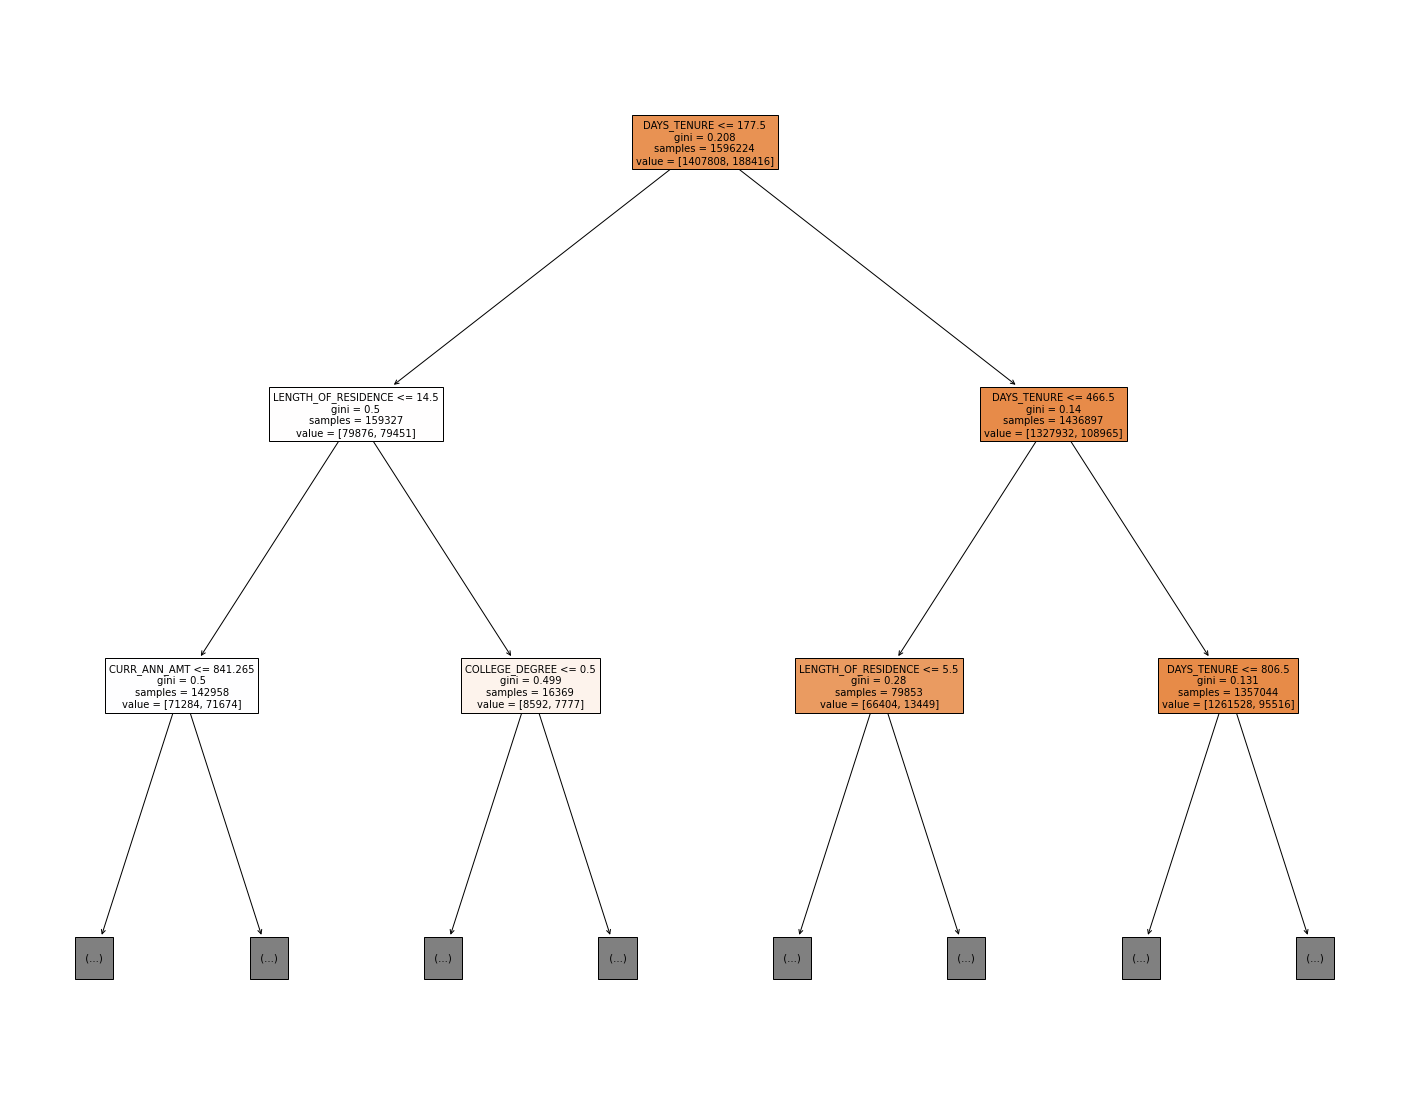

In [33]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=cols, filled=True, max_depth=2)

#left child = True
#Right child= False

#Gini Index
#0=perfect equality
#1=very unequal

In [34]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

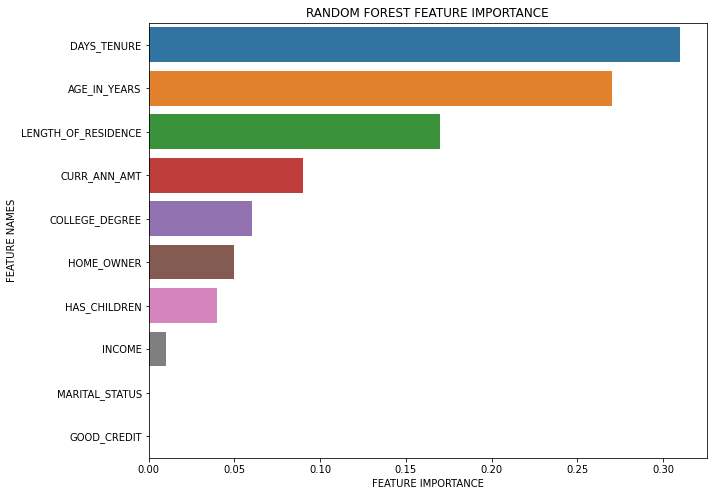

In [35]:
plot_feature_importance(rf.feature_importances_,cols,'RANDOM FOREST')

## Oversampling

In [36]:
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# from sklearn.model_selection import train_test_split

# Separate the independent variables from the dependent variable
X_over = df.drop('acct_terminated', axis=1)  # Features (independent variables)
y_over = df['acct_terminated']  # Target variable (dependent variable)

# Create the RandomOverSampler instance targeting the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')

# Apply oversampling to the dataset
X_resampled, y_resampled = oversampler.fit_resample(X_over, y_over)

print("Before oversampling: ", Counter(y_over))
print("After oversampling: ", Counter(y_resampled))

Before oversampling:  Counter({0.0: 2011061, 1.0: 269259})
After oversampling:  Counter({0.0: 2011061, 1.0: 2011061})


In [37]:
# Convert the resampled arrays back to DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X_over.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['acct_terminated'])

resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(resampled_df)

         INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT  DAYS_TENURE  \
0         2.213000e+11  5.213000e+11        818.87       1454.0   
1         2.213001e+11  5.213001e+11        974.19       1795.0   
2         2.213007e+11  5.213002e+11        967.37       4818.0   
3         2.213016e+11  5.213006e+11        992.40        130.0   
4         2.213016e+11  5.213006e+11        784.63       5896.0   
...                ...           ...           ...          ...   
4022117   2.213027e+11  5.213010e+11        675.05         64.0   
4022118   2.213024e+11  5.213009e+11        585.27        195.0   
4022119   2.213010e+11  5.213004e+11        653.80        199.0   
4022120   2.213009e+11  5.213003e+11       1027.92         45.0   
4022121   2.213021e+11  5.213008e+11       1223.04         99.0   

        CUST_ORIG_DATE  AGE_IN_YEARS     INCOME  HAS_CHILDREN  \
0           2018-12-09        44.474   22500.00           1.0   
1           2018-01-02        72.559   27500.00           0.0   


In [38]:
resampled_df.to_csv('oversampling_data.csv', index=False)

In [39]:
df_over = pd.read_csv('oversampling_data.csv')

In [40]:
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']

X_over = df_over[cols]
y_over = df_over.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)

clf_over = DecisionTreeClassifier()
clf_over = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree accuracy:', accuracy)

Decision Tree accuracy: 0.9399372222394878


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94    401464
         1.0       0.89      1.00      0.94    402961

    accuracy                           0.94    804425
   macro avg       0.95      0.94      0.94    804425
weighted avg       0.95      0.94      0.94    804425



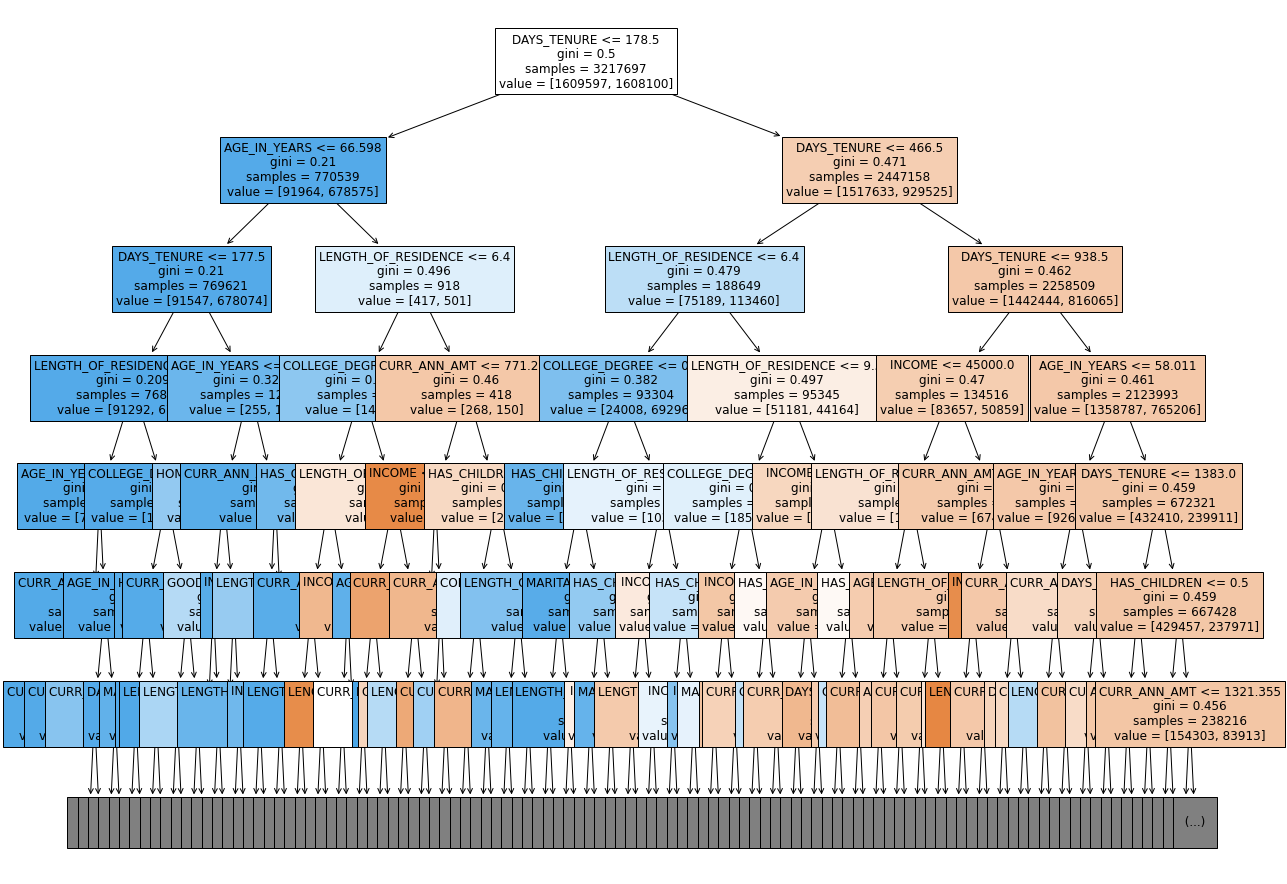

In [42]:
fig = plt.figure(figsize=(20, 16))

_ = tree.plot_tree(clf_over, feature_names=cols, filled=True, fontsize=12, max_depth=6)

plt.show()

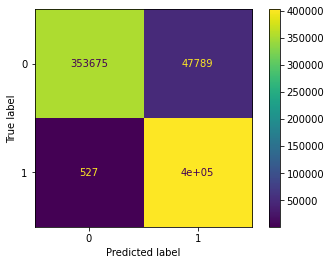

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf_over.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [45]:
# https://stackoverflow.com/questions/30408046/finding-a-corresponding-leaf-node-for-each-data-point-in-a-decision-tree-scikit

cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']

X_over = df_over[cols]
y_over = df_over.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)

clf_over = DecisionTreeClassifier()

clf_over.fit(X_train, y_train)


# Make predictions and get leaf node labels for each data point
leaf_labels = clf_over.apply(X_over)
# Add leaf node labels to the original dataframe
df_over['Leaf_Node'] = leaf_labels



aggregated_data = df_over.groupby('Leaf_Node')['acct_terminated'].value_counts().unstack().fillna(0)
aggregated_data.columns = ['Non_Churn_Count', 'Churn_Count']

print(aggregated_data)

           Non_Churn_Count  Churn_Count
Leaf_Node                              
5                      5.0          0.0
16                     3.0          0.0
22                     0.0          7.0
23                     2.0          0.0
25                     1.0         37.0
...                    ...          ...
675836                 1.0          0.0
675837                 2.0          0.0
675838                15.0          0.0
675839                 0.0          5.0
675840                71.0          0.0

[337921 rows x 2 columns]


In [46]:
# https://github.com/dockersamples/customer-churnapp-streamlit/blob/main/Churn_EDA_model_development.ipynb

from sklearn.linear_model import LogisticRegression

cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']

X_over = df_over[cols]
y_over = df_over.acct_terminated


model_over = LogisticRegression(solver='lbfgs', random_state=1)

model_over.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [47]:
from sklearn.metrics import precision_recall_fscore_support

preds = model_over.predict(X_over)

precision, recall, f1_score, support = precision_recall_fscore_support(y_over, preds, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)

Precision: 0.6318276526547935
Recall: 0.6500404512841729
F1-score: 0.6408046681300323
Support: None


In [48]:
# Resource: https://github.com/dockersamples/customer-churnapp-streamlit/blob/main/Churn_EDA_model_development.ipynb

# Testing the model with a new instance of customer
customer = {
    'CURR_ANN_AMT': 912.22,
    'DAYS_TENURE': 120.0,
    'AGE_IN_YEARS': 55,
    'INCOME': 25500.00,
    'HAS_CHILDREN': 1.0,
    'LENGTH_OF_RESIDENCE': 7.7,
    'MARITAL_STATUS': 1,
    'HOME_OWNER': 1,
    'COLLEGE_DEGREE': 1,
    'GOOD_CREDIT': 1
}

# Convert the customer dictionary to a 2D array and use it as input for prediction
X_customer = [list(customer.values())]

# Make prediction for the customer data using the trained logistic regression model
prediction = model_over.predict_proba(X_customer)[0, 1]

print(prediction)

0.6527402091638761


C:\Users\ms904\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
# Testing the model with a new instance of customer
customer = {
    'CURR_ANN_AMT': 112.00,
    'DAYS_TENURE': 420.0,
    'AGE_IN_YEARS': 27,
    'INCOME': 55700.00,
    'HAS_CHILDREN': 0.0,
    'LENGTH_OF_RESIDENCE': 4.5,
    'MARITAL_STATUS': 0,
    'HOME_OWNER': 1,
    'COLLEGE_DEGREE': 1,
    'GOOD_CREDIT': 1
}

X_customer = [list(customer.values())]

prediction = model_over.predict_proba(X_customer)[0, 1]

print(prediction)

0.5002327544412667


C:\Users\ms904\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
# Randomly sample 10% of the data for faster testing
sampled_df = df.sample(frac=0.1, random_state=1)

cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X_over = sampled_df[cols]
y_over = sampled_df['acct_terminated']

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)

# Create the RandomForestClassifier instance with n_jobs=-1 for parallel processing
rf_over = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf_over.fit(X_train, y_train)

y_pred2 = rf_over.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print('Random Forest accuracy:', accuracy)

Random Forest accuracy: 0.9399372222394878


In [51]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     40119
         1.0       0.48      0.22      0.30      5488

    accuracy                           0.88     45607
   macro avg       0.69      0.59      0.62     45607
weighted avg       0.85      0.88      0.86     45607



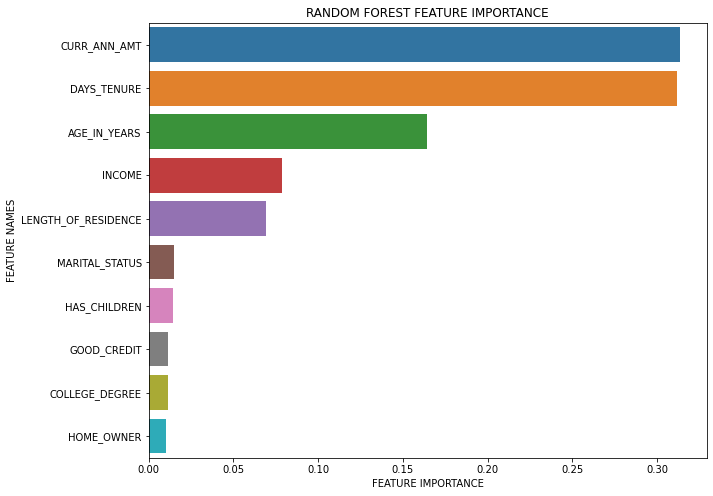

In [52]:
plot_feature_importance(rf_over.feature_importances_,cols,'RANDOM FOREST')

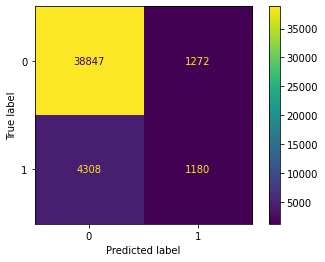

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = rf_over.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

## Undersampling

In [54]:
#Before I undersample, I want to see the starting values for terminated vs active accounts 
#There table terminated accounts 269,259 initially before rows with NaN were deleted. 
terminatedCount = len(df[df["acct_terminated"]==1])
print(terminatedCount)
activeCount = len(df[df["acct_terminated"]==0])
print(activeCount)

269259
2011061


In [55]:
#For undersampling, the number of tuples of terminated and active accounts should be the same
#After removing the NaN rows, we are only left with 27,542 terminated accounts and 220220 active accounts
#Next, we need the number of active accouts to be equal to the number of terminated accounts. 
active = df[df['acct_terminated'] == 0]
active = active.head(269259) #take the first 269259 rows
terminated = df[df['acct_terminated'] == 1]

In [56]:
#Combine the active and terminated dataframes
frames = [active, terminated]
df_undersample = pd.concat(frames)
df_undersample

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
0,2.213000e+11,0.0,5.213000e+11,818.87,1454.0,2018-12-09,44.474,22500.00,1.0,15.0,1,50000 - 74999,1.0,1.0,1.0
1,2.213001e+11,0.0,5.213001e+11,974.19,1795.0,2018-01-02,72.559,27500.00,0.0,2.0,0,50000 - 74999,1.0,0.0,0.0
2,2.213007e+11,0.0,5.213002e+11,967.37,4818.0,2009-09-23,55.444,42500.00,0.0,10.0,1,75000 - 99999,1.0,0.0,0.0
4,2.213016e+11,0.0,5.213006e+11,784.63,5896.0,2006-10-11,50.220,87500.00,1.0,4.0,1,225000 - 249999,1.0,1.0,1.0
5,2.213027e+11,0.0,5.213010e+11,909.91,484.0,2021-08-05,32.641,52500.00,0.0,2.0,1,125000 - 149999,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280275,2.213032e+11,1.0,5.213014e+11,1009.71,1204.0,2019-08-16,55.444,47500.00,0.0,0.0,1,75000 - 99999,0.0,0.0,1.0
2280282,2.213014e+11,1.0,5.213005e+11,866.20,140.0,2022-07-15,56.307,125000.00,1.0,15.0,1,125000 - 149999,1.0,0.0,1.0
2280290,2.213011e+11,1.0,5.213004e+11,1121.54,161.0,2022-06-24,55.444,80372.17,0.0,6.8,1,25000 - 49999,0.0,0.0,0.0
2280300,2.213006e+11,1.0,5.213002e+11,1257.56,98.0,2022-08-26,44.808,27500.00,1.0,6.8,0,25000 - 49999,0.0,1.0,0.0


In [57]:
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X = df_undersample[cols]
y = df_undersample.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

clf_under = DecisionTreeClassifier()
clf_under = clf_under.fit(X_train,y_train)
y_pred = clf_under.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5989192601946074


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.59      0.60     80813
         1.0       0.60      0.60      0.60     80743

    accuracy                           0.60    161556
   macro avg       0.60      0.60      0.60    161556
weighted avg       0.60      0.60      0.60    161556



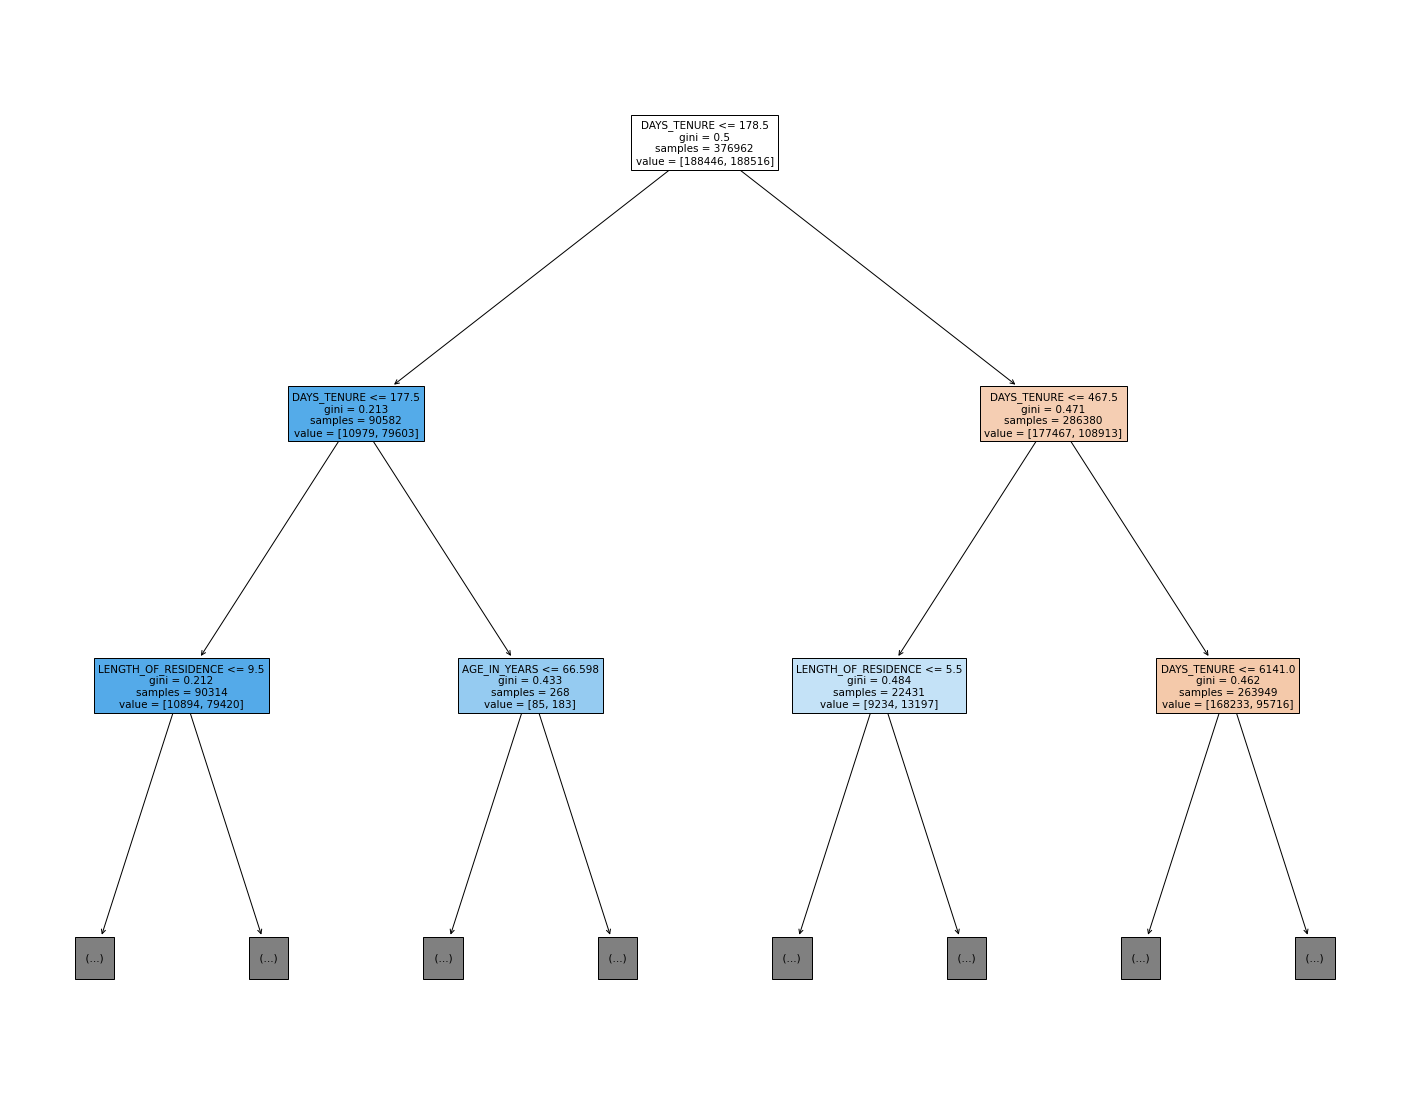

In [59]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_under, feature_names=cols, filled=True, max_depth=2)

Resource: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

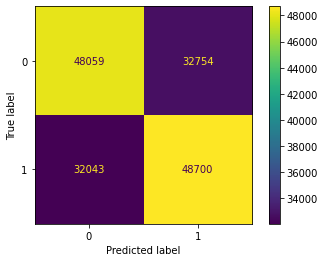

In [60]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf_under.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [61]:
rf_under = RandomForestClassifier(max_depth=1)
rf_under.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [62]:
y_pred2 = rf_under.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", accuracy2)

Random Forest Accuracy: 0.681466488400307


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.62      0.94      0.75     80813
         1.0       0.88      0.42      0.57     80743

    accuracy                           0.68    161556
   macro avg       0.75      0.68      0.66    161556
weighted avg       0.75      0.68      0.66    161556



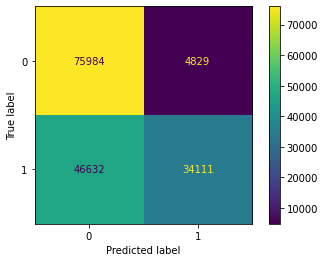

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf_under.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)

cm_display = ConfusionMatrixDisplay(cm).plot()

Resource for ROC curve: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

In [65]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_under.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

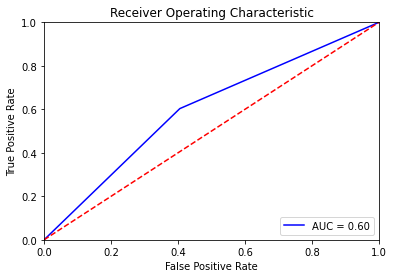

In [66]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_under.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

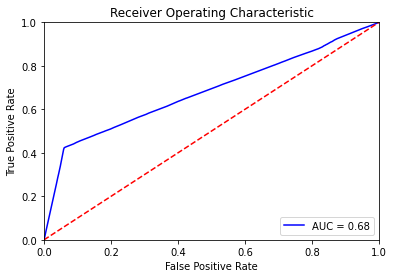

In [68]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ROC Curves and AUC Values for All Datasets and Models

Resources: https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python
https://www.statology.org/plot-multiple-roc-curves-python/

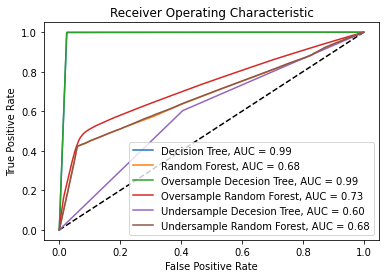

In [69]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = clf.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = metrics.auc(fpr1, tpr1)

y_pred_prob2 = rf.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = metrics.auc(fpr2, tpr2)

y_pred_prob3 = clf_over.predict_proba(X_test)[:,1]     #change clf to decision tree oversample model name
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = metrics.auc(fpr3, tpr3)

y_pred_prob4 = rf_over.predict_proba(X_test)[:,1]      #Change rf to rf over model name
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
roc_auc4 = metrics.auc(fpr4, tpr4)

y_pred_prob5 = clf_under.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)
roc_auc5 = metrics.auc(fpr5, tpr5)

y_pred_prob6 = rf_under.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)
roc_auc6 = metrics.auc(fpr6, tpr6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'Decision Tree, AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'Random Forest, AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'Oversample Decesion Tree, AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'Oversample Random Forest, AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'Undersample Decesion Tree, AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, label = 'Undersample Random Forest, AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()